In [1]:
# https://www.pinecone.io/learn/sentence-embeddings/
# https://www.youtube.com/watch?v=WS1uVMGhlWQ&list=PLIUOU7oqGTLgz-BI8bNMVGwQxIMuQddJO&index=2
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

The output we can see here is the SentenceTransformer object which contains three components:

The transformer itself, here we can see the max sequence length of 128 tokens and whether to lowercase any input (in this case, the model does not). We can also see the model class, BertModel.

The pooling operation, here we can see that we are producing a 768-dimensional sentence embedding. We are doing this using the mean pooling method.

In [2]:
sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials"
]

embeddings = model.encode(sentences)

embeddings.shape

(5, 768)

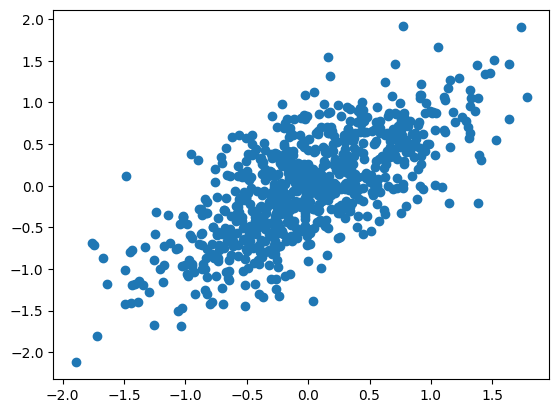

In [9]:
sentences = [
    "Adam",
    "Eve"
]

embeddings = model.encode(sentences)

embeddings.shape
import matplotlib.pyplot as plt
plt.scatter(embeddings[0], embeddings[1]);

In [3]:
# we have calculated the cosine similarity between every combination of our five sentence embeddings
import numpy as np
from sentence_transformers.util import cos_sim

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.409143  , 1.        , 0.        , 0.        , 0.        ],
       [0.10909013, 0.44547972, 1.        , 0.        , 0.        ],
       [0.50074863, 0.30693939, 0.20791632, 1.        , 0.        ],
       [0.29936197, 0.38607213, 0.28499264, 0.63849485, 1.        ]])

Last row shows the comparison between the sentences. You can create a heatmap to visualize the cosine better.

In [4]:
from sentence_transformers import SentenceTransformer

mpnet = SentenceTransformer('all-mpnet-base-v2')

mpnet

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [5]:
embeddings = mpnet.encode(sentences)

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cos_sim(embeddings[i], embeddings[i:])

sim

array([[ 1.00000012,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.26406276,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.1650348 ,  0.16126674,  1.        ,  0.        ,  0.        ],
       [ 0.04334446,  0.04615863,  0.05670125,  0.99999994,  0.        ],
       [ 0.05398511,  0.06101185, -0.01122269,  0.51847208,  1.00000012]])

The semantic representation of later models is apparent. Although SBERT correctly identifies 4 and 3 as the most similar pair, it also assigns reasonably high similarity to other sentence pairs.

On the other hand, the MPNet model makes a very clear distinction between similar and dissimilar pairs, with most pairs scoring less than 0.1 and the 4-3 pair scored at 0.52.

By increasing the separation between dissimilar and similar pairs, we’re:

* Making it easier to automatically identify relevant pairs.
* Pushing predictions closer to the 0 and 1 target scores for dissimilar and similar pairs used during training.

### Cosine Similarity Notes
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

Smaller angles between vectors produce larger cosine values, indicating greater cosine similarity. For example: When two vectors have the same orientation, the angle between them is 0, and the cosine similarity is 1. Perpendicular vectors have a 90-degree angle between them and a cosine similarity of 0.

The cosine similarity is described mathematically as the division between the dot product of vectors and the product of the euclidean norms or magnitude of each vector.


### Natural Language Inference (NLI)

NLI focus on identifying sentence pairs that infer or do not infer one another. We will use two of these datasets; the Stanford Natural Language Inference (SNLI) and Multi-Genre NLI (MNLI) corpora.

Merging these two corpora gives us 943K sentence pairs (550K from SNLI, 393K from MNLI). All pairs include a premise and a hypothesis, and each pair is assigned a label:

* 0 — entailment, e.g. the premise suggests the hypothesis.
* 1 — neutral, the premise and hypothesis could both be true, but they are not necessarily related.
* 2 — contradiction, the premise and hypothesis contradict each other.

* https://www.pinecone.io/learn/train-sentence-transformers-softmax/
* https://www.youtube.com/watch?v=aSx0jg9ZILo&list=PLIUOU7oqGTLgz-BI8bNMVGwQxIMuQddJO&index=3

In [4]:
import datasets

snli = datasets.load_dataset('snli', split='train')

snli

Reusing dataset snli (C:\Users\piush\.cache\huggingface\datasets\snli\plain_text\1.0.0\1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b)


Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 550152
})

In [5]:
print(snli[0])

{'premise': 'A person on a horse jumps over a broken down airplane.', 'hypothesis': 'A person is training his horse for a competition.', 'label': 1}


In [6]:
m_nli = datasets.load_dataset('glue', 'mnli', split='train')

m_nli

Reusing dataset glue (C:\Users\piush\.cache\huggingface\datasets\glue\mnli\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Dataset({
    features: ['premise', 'hypothesis', 'label', 'idx'],
    num_rows: 392702
})

In [7]:
m_nli = m_nli.remove_columns(['idx'])
snli = snli.cast(m_nli.features)
dataset = datasets.concatenate_datasets([snli, m_nli])

Loading cached processed dataset at C:\Users\piush\.cache\huggingface\datasets\snli\plain_text\1.0.0\1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b\cache-b5fc5c7da89ce7e6.arrow


Both datasets contain -1 values in the label feature where no confident class could be assigned. We remove them using the filter method.

In [8]:
print(len(dataset))
# there are -1 values in the label feature, these are where no class could be decided so we remove
dataset = dataset.filter(
    lambda x: 0 if x['label'] == -1 else 1
)
print(len(dataset))

Loading cached processed dataset at C:\Users\piush\.cache\huggingface\datasets\snli\plain_text\1.0.0\1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b\cache-0372113c5208bfb5.arrow


942854
942069


We must convert our human-readable sentences into transformer-readable tokens, so we go ahead and tokenize our sentences. Both premise and hypothesis features must be split into their own input_ids and attention_mask tensors.

In [9]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
all_cols = ['label']

for part in ['premise', 'hypothesis']:
    dataset = dataset.map(
        lambda x: tokenizer(
            x[part], max_length=128, padding='max_length',
            truncation=True
        ), batched=True
    )
    for col in ['input_ids', 'attention_mask']:
        dataset = dataset.rename_column(
            col, part+'_'+col
        )
        all_cols.append(part+'_'+col)
print(all_cols)

  0%|          | 0/943 [00:00<?, ?ba/s]

  0%|          | 0/943 [00:00<?, ?ba/s]

KeyboardInterrupt: 

Now, all we need to do is prepare the data to be read into the model. To do this, we first convert the dataset features into PyTorch tensors and then initialize a data loader which will feed data into our model during training.

In [ ]:
# covert dataset features to PyTorch tensors
dataset.set_format(type='torch', columns=all_cols)

# initialize the dataloader
batch_size = 16
loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

NameError: name 'dataset' is not defined

### Model Preparation
When we train an SBERT model, we don’t need to start from scratch. We begin with an already pretrained BERT model (and tokenizer).

In [ ]:
from transformers import BertModel

# start from a pretrained bert-base-uncased model
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
# define mean pooling function
def mean_pool(token_embeds, attention_mask):
    # reshape attention_mask to cover 768-dimension embeddings
    in_mask = attention_mask.unsqueeze(-1).expand(
        token_embeds.size()
    ).float()
    # perform mean-pooling but exclude padding tokens (specified by in_mask)
    pool = torch.sum(token_embeds * in_mask, 1) / torch.clamp(
        in_mask.sum(1), min=1e-9
    )
    return pool

In [ ]:
# we would initialize the feed-forward NN first
ffnn = torch.nn.Linear(768*3, 3)
# then later in the code process our concatenated vector with it
x = ffnn(x)

In [ ]:
# as before, we would initialize the loss function first
loss_func = torch.nn.CrossEntropyLoss()
# then later in the code add them to the process
x = loss_func(x, label)  # label is our *true* 0, 1, 2 class

In [ ]:
from transformers.optimization import get_linear_schedule_with_warmup

# we would initialize everything first
optim = torch.optim.Adam(model.parameters(), lr=2e-5)
# and setup a warmup for the first ~10% steps
total_steps = int(len(dataset) / batch_size)
warmup_steps = int(0.1 * total_steps)
scheduler = get_linear_schedule_with_warmup(
		optim, num_warmup_steps=warmup_steps,
  	num_training_steps=total_steps - warmup_steps
)
# then during the training loop we update the scheduler per step
scheduler.step()

In [ ]:
from tqdm.auto import tqdm

# 1 epoch should be enough, increase if wanted
for epoch in range(1):
    model.train()  # make sure model is in training mode
    # initialize the dataloader loop with tqdm (tqdm == progress bar)
    loop = tqdm(loader, leave=True)
    for batch in loop:
        # zero all gradients on each new step
        optim.zero_grad()
        # prepare batches and more all to the active device
        inputs_ids_a = batch['premise_input_ids'].to(device)
        inputs_ids_b = batch['hypothesis_input_ids'].to(device)
        attention_a = batch['premise_attention_mask'].to(device)
        attention_b = batch['hypothesis_attention_mask'].to(device)
        label = batch['label'].to(device)
        # extract token embeddings from BERT
        u = model(
            inputs_ids_a, attention_mask=attention_a
        )[0]  # all token embeddings A
        v = model(
            inputs_ids_b, attention_mask=attention_b
        )[0]  # all token embeddings B
        # get the mean pooled vectors
        u = mean_pool(u, attention_a)
        v = mean_pool(v, attention_b)
        # build the |u-v| tensor
        uv = torch.sub(u, v)
        uv_abs = torch.abs(uv)
        # concatenate u, v, |u-v|
        x = torch.cat([u, v, uv_abs], dim=-1)
        # process concatenated tensor through FFNN
        x = ffnn(x)
        # calculate the 'softmax-loss' between predicted and true label
        loss = loss_func(x, label)
        # using loss, calculate gradients and then optimize
        loss.backward()
        optim.step()
        # update learning rate scheduler
        scheduler.step()
        # update the TDQM progress bar
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())

In [ ]:
import os

model_path = './sbert_test_a'

if not os.path.exists(model_path):
    os.mkdir(model_path)

model.save_pretrained(model_path)

### Fine-Tuning With Sentence Transformers

the sentence-transformers library has excellent support for those of us just wanting to train a model without worrying about the underlying training mechanisms.

We don’t need to do much beyond a little data preprocessing

In [11]:
import datasets

# download
snli = datasets.load_dataset('snli', split='train')
mnli = datasets.load_dataset('glue', 'mnli', split='train')

# format for merge
mnli = mnli.remove_columns(['idx'])
snli = snli.cast(mnli.features)

# merge
nli = datasets.concatenate_datasets([snli, mnli])
del snli, mnli

# and remove bad rows
nli = nli.filter(
    lambda x: False if x['label'] == -1 else True
)

Reusing dataset snli (C:\Users\piush\.cache\huggingface\datasets\snli\plain_text\1.0.0\1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b)
Reusing dataset glue (C:\Users\piush\.cache\huggingface\datasets\glue\mnli\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
Loading cached processed dataset at C:\Users\piush\.cache\huggingface\datasets\snli\plain_text\1.0.0\1f60b67533b65ae0275561ff7828aad5ee4282d0e6f844fd148d05d3c6ea251b\cache-b5fc5c7da89ce7e6.arrow


  0%|          | 0/943 [00:00<?, ?ba/s]

In [12]:
from sentence_transformers import InputExample
from tqdm.auto import tqdm  # so we see progress bar

train_samples = []
for row in tqdm(nli):
    train_samples.append(InputExample(
        texts=[row['premise'], row['hypothesis']],
        label=row['label']
    ))

  0%|          | 0/942069 [00:00<?, ?it/s]

In [13]:
from torch.utils.data import DataLoader

batch_size = 16

loader = DataLoader(
    train_samples, shuffle=True, batch_size=batch_size)

All we need is the transformer model module, followed by a mean pooling module. The transformer models are loaded from HF, so we define bert-base-uncased as before.

In [14]:
from sentence_transformers import models, SentenceTransformer

bert = models.Transformer('bert-base-uncased')
pooler = models.Pooling(
    bert.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True
)

model = SentenceTransformer(modules=[bert, pooler])

model

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

We have our data, the model, and now we define how to optimize our model. Softmax loss is very easy to initialize.

In [15]:
from sentence_transformers import losses

loss = losses.SoftmaxLoss(
    model=model,
    sentence_embedding_dimension=model.get_sentence_embedding_dimension(),
    num_labels=3)  # NLI dataset has [0, 1, 2] labels

Now we’re ready to train the model. We train for a single epoch and warm up for 10% of training as before.

In [16]:
epochs = 1
warmup_steps = int(len(loader) * epochs * 0.1)

model.fit(
    train_objectives=[(loader, loss)],
    epochs=epochs,
    warmup_steps=warmup_steps,
    output_path='./sbert_test_b',
    show_progress_bar=False,
)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 2.00 GiB total capacity; 1.58 GiB already allocated; 0 bytes free; 1.72 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

### Compare SBERT Models

In [ ]:
sentences = [
    "the fifty mannequin heads floating in the pool kind of freaked them out",
    "she swore she just saw her sushi move",
    "he embraced his new life as an eggplant",
    "my dentist tells me that chewing bricks is very bad for your teeth",
    "the dental specialist recommended an immediate stop to flossing with construction materials",
    "i used to practice weaving with spaghetti three hours a day",
    "the white water rafting trip was suddenly halted by the unexpected brick wall",
    "the person would knit using noodles for a few hours daily",
    "it was always dangerous to drive with him since he insisted the safety cones were a slalom course",
    "the woman thinks she saw her raw fish and rice change position"
]

We define two new functions; sts_process to build the sentence embeddings and compare them with cosine similarity and sim_matrix to construct a similarity matrix from all possible pairs.

In [ ]:
import numpy as np

# build embeddings and calculate cosine similarity
def sts_process(sentence_a, sentence_b, model):
    vecs = []  # init list of sentence vecs
    for sentence in [sentence_a, sentence_b]:
        # build input_ids and attention_mask tensors with tokenizer
        input_ids = tokenizer(
            sentence, max_length=512, padding='max_length',
            truncation=True, return_tensors='pt'
        )
        # process tokens through model and extract token embeddings
        token_embeds = model(**input_ids).last_hidden_state
        # mean-pool token embeddings to create sentence embeddings
        sentence_embeds = mean_pool(token_embeds, input_ids['attention_mask'])
        vecs.append(sentence_embeds)
    # calculate cosine similarity between pairs and return numpy array
    return cos_sim(vecs[0], vecs[1]).detach().numpy()

# controller function to build similarity matrix
def sim_matrix(model):
    # initialize empty zeros array to store similarity scores
    sim = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        # add similarity scores to the similarity matrix
        sim[i:,i] = sts_process(sentences[i], sentences[i:], model)
    return sim

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('./sbert_test_a')

sim = sim_matrix(model)  # build similarity scores matrix
sns.heatmap(sim, annot=True)  # visualize heatmap

In these heatmaps, we ideally want all dissimilar pairs to have very low scores (near white) and similar pairs to produce distinctly higher scores.